In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="category_encoders")


In [2]:
df = pd.read_excel('ALL_FINANCING_FINAL_CLEAN2225.xlsx')
df

c:\Users\20230175\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NO_BASE,JK_WAKTU_BULAN,JK_WAKTU_TAHUN,TGL_DROPING,TGL_JATUH_TEMPO,KOL,JUMLAH_DROPPING,MARGIN_AWAL,RATE_CUST,C01_KATEGORI_KONSUMSI_USAHA,...,C05_ORIENTASI_PENGGUNAAN,C09_SEGMENTASI_ACCOUNT,C10_PROGRAM_PEMBIAYAAN,SEKTOR_LOAN,RATE,KATEGORI_NASABAH,SEGMENT_GROUP,OCCUPATION,FIXED_INCOME,MARITAL_STATUS
0,62109,72.0,6.0,2023-12-20,2029-12-25,NORM,50000000.0,1.489193e+07,29.78,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,9.00,BMI_STAFF,5-CONSUMER,KARYAWAN BANK,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
1,62109,84.0,7.0,2025-01-23,2032-01-25,NORM,76000000.0,2.998196e+07,39.45,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,10.00,BMI_STAFF,5-CONSUMER,KARYAWAN BANK,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
2,88913,48.0,4.0,2022-10-20,2026-10-25,NORM,47000000.0,7.326780e+06,15.59,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,7.29,BMI_STAFF,5-CONSUMER,KARYAWAN SWASTA,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN
3,123565,36.0,3.0,2022-08-16,2025-08-29,NORM,29600000.0,3.302841e+06,11.16,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,7.00,INDIVIDUAL,5-CONSUMER,PENDIDIK/GURU,Rp. 3 JUTA s.d < 5 JUTA,MENIKAH
4,179098,36.0,3.0,2022-05-27,2025-05-25,NORM,50000000.0,1.417491e+07,28.35,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,17.00,INDIVIDUAL,5-CONSUMER,KARYAWAN SWASTA,Rp. 3 JUTA s.d < 5 JUTA,KAWIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,5997634,24.0,2.0,2025-03-21,2027-03-10,NORM,25000000.0,2.686956e+06,10.75,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,10.00,INDIVIDUAL,5-CONSUMER,GURU,< Rp. 3 JUTA,BELUM KAWIN
10456,6003291,120.0,10.0,2025-03-13,2035-03-25,NORM,35000000.0,2.050331e+07,58.58,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,10.00,INDIVIDUAL,5-CONSUMER,GURU,< Rp. 3 JUTA,KAWIN
10457,6014701,120.0,10.0,2025-08-25,2035-08-27,NORM,200000000.0,1.040219e+08,52.01,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,9.00,INDIVIDUAL,5-CONSUMER,KARYAWAN SWASTA,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN
10458,6026419,96.0,8.0,2025-04-28,2033-04-27,NORM,74900000.0,3.420831e+07,45.67,99 - NU_Bukan Debitur_UMKM,...,9 - Lainnya,45_CONSUMER_MULTI PURPOSE,000_NO_PROGRAM,3_Konsumsi,10.00,INDIVIDUAL,5-CONSUMER,KARYAWAN SWASTA,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10460 entries, 0 to 10459
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NO_BASE                        10460 non-null  int64         
 1   JK_WAKTU_BULAN                 10458 non-null  float64       
 2   JK_WAKTU_TAHUN                 10458 non-null  float64       
 3   TGL_DROPING                    10460 non-null  datetime64[ns]
 4   TGL_JATUH_TEMPO                10460 non-null  datetime64[ns]
 5   KOL                            10460 non-null  object        
 6   JUMLAH_DROPPING                10460 non-null  float64       
 7   MARGIN_AWAL                    10460 non-null  float64       
 8   RATE_CUST                      10460 non-null  float64       
 9   C01_KATEGORI_KONSUMSI_USAHA    10460 non-null  object        
 10  C02_KATEG_PRTFOLIO_KONSUM_USH  10460 non-null  object        
 11  C05_ORIENTASI_P

In [4]:
df.drop(columns=['NO_BASE','JK_WAKTU_BULAN','TGL_DROPING','TGL_JATUH_TEMPO','RATE','OCCUPATION','C10_PROGRAM_PEMBIAYAAN','MARGIN_AWAL','C05_ORIENTASI_PENGGUNAAN','C01_KATEGORI_KONSUMSI_USAHA','C02_KATEG_PRTFOLIO_KONSUM_USH'],inplace=True)

In [5]:
df.duplicated().sum()

2568

In [6]:
df.isnull().sum()

JK_WAKTU_TAHUN            2
KOL                       0
JUMLAH_DROPPING           0
RATE_CUST                 0
C09_SEGMENTASI_ACCOUNT    5
SEKTOR_LOAN               0
KATEGORI_NASABAH          0
SEGMENT_GROUP             7
FIXED_INCOME              0
MARITAL_STATUS            0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

JK_WAKTU_TAHUN            0
KOL                       0
JUMLAH_DROPPING           0
RATE_CUST                 0
C09_SEGMENTASI_ACCOUNT    0
SEKTOR_LOAN               0
KATEGORI_NASABAH          0
SEGMENT_GROUP             0
FIXED_INCOME              0
MARITAL_STATUS            0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)


C:\Users\20230175\AppData\Local\Temp\ipykernel_21596\3617111529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
df.duplicated().sum()

0

## EDA

In [13]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,JK_WAKTU_TAHUN,JUMLAH_DROPPING,RATE_CUST
count,7883.00,7883.00,7883.00
mean,3.87,172522672.66,23.56
std,3.03,1795927588.08,21.38
min,0.00,54000.00,0.08
25%,2.00,21974870.40,8.31
50%,3.00,50000000.00,17.86
75%,5.00,126901009.16,28.77
max,25.00,133733848311.69,207.48


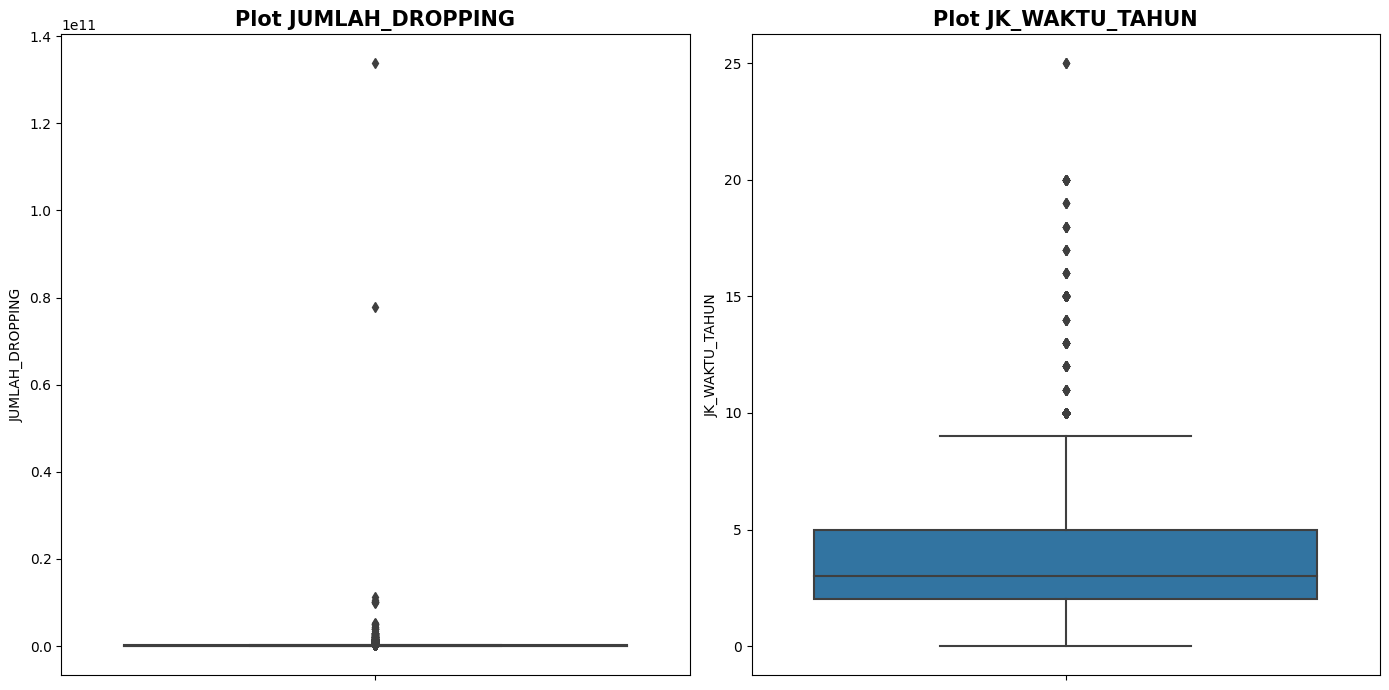

In [14]:
# Buat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot JUMLAH_DROPPING
sns.boxplot(y=df['JUMLAH_DROPPING'], ax=axes[0])  # pakai y biar orientasi konsisten
axes[0].set_title('Plot JUMLAH_DROPPING', size=15, weight='bold')

# Boxplot JK_WAKTU_TAHUN
sns.boxplot(y=df['JK_WAKTU_TAHUN'], ax=axes[1])
axes[1].set_title('Plot JK_WAKTU_TAHUN', size=15, weight='bold')

plt.tight_layout()
plt.show()

In [15]:
df[df['JUMLAH_DROPPING']>500000000]

,JK_WAKTU_TAHUN,KOL,JUMLAH_DROPPING,RATE_CUST,C09_SEGMENTASI_ACCOUNT,SEKTOR_LOAN,KATEGORI_NASABAH,SEGMENT_GROUP,FIXED_INCOME,MARITAL_STATUS
12,2.00,NORM,510332650.00,10.49,48_CONSUMER_CICIL_EMAS,3_Konsumsi,PRIORITY,5-CONSUMER,> Rp. 50 JUTA,KAWIN
47,2.00,NORM,1000000000.00,1.57,21_RETAIL_SME,2_Investasi,PRIORITY,3-SME,< Rp. 3 JUTA,KAWIN
48,2.00,NORM,1000000000.00,6.91,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,PRIORITY,5-CONSUMER,< Rp. 3 JUTA,KAWIN
63,5.00,NORM,750000000.00,4.51,21_RETAIL_SME,2_Investasi,PRIORITY,3-SME,< Rp. 3 JUTA,KAWIN
124,10.00,NORM,600000000.00,15.87,41_CONSUMER_MORTGAGE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
...,...,...,...,...,...,...,...,...,...,...
10098,1.00,NORM,1000000000.00,0.81,21_RETAIL_SME,1_Modal Kerja,PRIORITY,3-SME,Rp. 25 JUTA s.d < 50 JUTA,KAWIN
10197,11.00,NORM,1350000000.00,61.55,41_CONSUMER_MORTGAGE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,> Rp. 50 JUTA,KAWIN
10316,0.00,NORM,2500000000.00,0.87,21_RETAIL_SME,2_Investasi,PRIORITY,3-SME,Rp. 25 JUTA s.d < 50 JUTA,KAWIN
10317,0.00,NORM,2246750000.00,0.87,21_RETAIL_SME,1_Modal Kerja,PRIORITY,3-SME,Rp. 25 JUTA s.d < 50 JUTA,KAWIN


In [16]:
df=df[df['JUMLAH_DROPPING']<200000000]

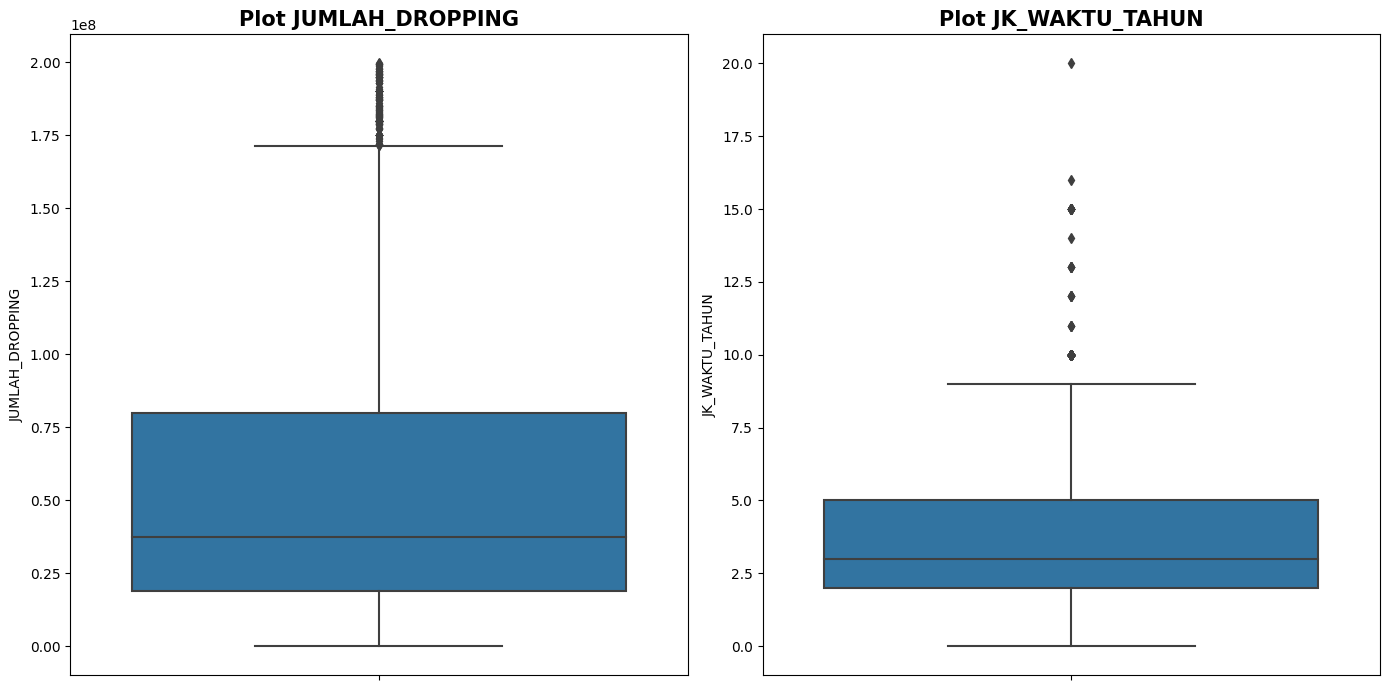

In [17]:
# Buat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot JUMLAH_DROPPING
sns.boxplot(y=df['JUMLAH_DROPPING'], ax=axes[0])  # pakai y biar orientasi konsisten
axes[0].set_title('Plot JUMLAH_DROPPING', size=15, weight='bold')

# Boxplot JK_WAKTU_TAHUN
sns.boxplot(y=df['JK_WAKTU_TAHUN'], ax=axes[1])
axes[1].set_title('Plot JK_WAKTU_TAHUN', size=15, weight='bold')

plt.tight_layout()
plt.show()

In [18]:
df.head()

,JK_WAKTU_TAHUN,KOL,JUMLAH_DROPPING,RATE_CUST,C09_SEGMENTASI_ACCOUNT,SEKTOR_LOAN,KATEGORI_NASABAH,SEGMENT_GROUP,FIXED_INCOME,MARITAL_STATUS
0,6.00,NORM,50000000.00,29.78,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
1,7.00,NORM,76000000.00,39.45,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
2,4.00,NORM,47000000.00,15.59,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN
3,3.00,NORM,29600000.00,11.16,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,MENIKAH
4,3.00,NORM,50000000.00,28.35,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,KAWIN


In [19]:
# Cek detail information for any feature
check_unique = []

for col in df.columns:
    check_unique.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_unique= pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=check_unique)
df_unique

,dataFeatures,dataType,null,unique,uniqueSample
0,JK_WAKTU_TAHUN,float64,0,18,"[6.0, 13.0]"
1,KOL,object,0,4,"[WTCH, LOSS]"
2,JUMLAH_DROPPING,float64,0,2350,"[59900000.0, 21402974.4]"
3,RATE_CUST,float64,0,750,"[17.41, 5.5]"
4,C09_SEGMENTASI_ACCOUNT,object,0,7,"[46_CONSUMER_HAJJ, 21_RETAIL_SME]"
5,SEKTOR_LOAN,object,0,6,"[2 - Investasi, 3 - KONSUMSI]"
6,KATEGORI_NASABAH,object,0,3,"[PRIORITY, INDIVIDUAL]"
7,SEGMENT_GROUP,object,0,3,"[5-CONSUMER, 3-SME]"
8,FIXED_INCOME,object,0,6,"[Rp. 3 JUTA s.d < 5 JUTA, < Rp. 3 JUTA]"
9,MARITAL_STATUS,object,0,7,"[KAWIN, CERAI HIDUP]"


In [20]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,JK_WAKTU_TAHUN,JUMLAH_DROPPING,RATE_CUST
JK_WAKTU_TAHUN,1.00,0.47,0.84
JUMLAH_DROPPING,0.47,1.00,0.43
RATE_CUST,0.84,0.43,1.00


Text(0.5, 1.0, 'Correlation Matrix')

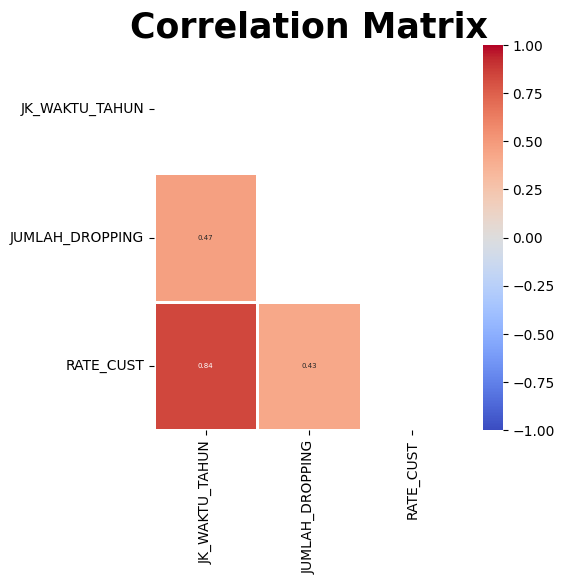

In [21]:
# Correlation Matrix
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True,linewidths=1,fmt='.2f',cmap='coolwarm',vmin=-1, vmax=1, mask=mask, annot_kws={'size':5})
plt.title('Correlation Matrix', size=25, weight='bold')
# plt.savefig('Correaltion Matrix.jpg', bbox_inches='tight')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6508 entries, 0 to 10459
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JK_WAKTU_TAHUN          6508 non-null   float64
 1   KOL                     6508 non-null   object 
 2   JUMLAH_DROPPING         6508 non-null   float64
 3   RATE_CUST               6508 non-null   float64
 4   C09_SEGMENTASI_ACCOUNT  6508 non-null   object 
 5   SEKTOR_LOAN             6508 non-null   object 
 6   KATEGORI_NASABAH        6508 non-null   object 
 7   SEGMENT_GROUP           6508 non-null   object 
 8   FIXED_INCOME            6508 non-null   object 
 9   MARITAL_STATUS          6508 non-null   object 
dtypes: float64(3), object(7)
memory usage: 559.3+ KB


# **Modelling**

**Import Library Machine Learning**

In [23]:
# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6508 entries, 0 to 10459
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   JK_WAKTU_TAHUN          6508 non-null   float64
 1   KOL                     6508 non-null   object 
 2   JUMLAH_DROPPING         6508 non-null   float64
 3   RATE_CUST               6508 non-null   float64
 4   C09_SEGMENTASI_ACCOUNT  6508 non-null   object 
 5   SEKTOR_LOAN             6508 non-null   object 
 6   KATEGORI_NASABAH        6508 non-null   object 
 7   SEGMENT_GROUP           6508 non-null   object 
 8   FIXED_INCOME            6508 non-null   object 
 9   MARITAL_STATUS          6508 non-null   object 
dtypes: float64(3), object(7)
memory usage: 559.3+ KB


In [25]:
df['FIXED_INCOME'].unique()

array(['Rp. 5 JUTA s.d < 10 JUTA', 'Rp. 3 JUTA s.d < 5 JUTA',
       'Rp. 10 JUTA s.d < 25 JUTA', '< Rp. 3 JUTA',
       'Rp. 25 JUTA s.d < 50 JUTA', ' > Rp. 50 JUTA'], dtype=object)

In [26]:
# Definisi mapping ordinal
ordinal_mapping = [
    {'col': 'FIXED_INCOME', 'mapping': {
        '< Rp. 3 JUTA': 0,
        'Rp. 3 JUTA s.d < 5 JUTA': 1,
        'Rp. 5 JUTA s.d < 10 JUTA': 2,
        'Rp. 10 JUTA s.d <'
        ' 25 JUTA': 3,
        'Rp. 25 JUTA s.d < 50 JUTA': 4,
        '> Rp. 50 JUTA': 5
    }}
]

# Pipeline untuk encoding ordinal + scaling
pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

# ColumnTransformer sesuai kolom di dataset
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['JK_WAKTU_TAHUN', 'RATE_CUST']),
    ('binary', BinaryEncoder(), [
        'KOL',
        'C09_SEGMENTASI_ACCOUNT',
        'SEKTOR_LOAN',
        'KATEGORI_NASABAH',
        'SEGMENT_GROUP',
        'MARITAL_STATUS'
    ]),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['FIXED_INCOME'])
], remainder='passthrough')

# Cek hasil definisi transformer
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['JK_WAKTU_TAHUN', 'RATE_CUST']),
                                ('binary', BinaryEncoder(),
                                 ['KOL', 'C09_SEGMENTASI_ACCOUNT',
                                  'SEKTOR_LOAN', 'KATEGORI_NASABAH',
                                  'SEGMENT_GROUP', 'MARITAL_STATUS']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'FIXED_INCOME',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': < Rp. 3 JUTA                 0
Rp. 3 JUTA s.d < 5 JUTA      1
Rp. 5 JUTA s.d < 10 JUTA     2
Rp. 10 JUTA s.d < 25 JUTA    3
Rp. 25 JUTA s.d < 50 JUTA    4
> Rp. 50 JUTA                5
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['FIXED_INCOME'])])

In [27]:
# Splitting data to be data independent and data dependent/target
X = df.drop(['JUMLAH_DROPPING'], axis=1)
y = df['JUMLAH_DROPPING']

In [28]:
# Splitting data to data train and data test with proportion 75 : 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# Transform target ke log
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [31]:
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42))
]

scaler = RobustScaler()

# ======================
# Cross Validation Benchmark (pakai target log)
# ======================
metrics = {
    'mae': 'neg_mean_absolute_error',
    'mape':'neg_mean_absolute_percentage_error',
    'rmse':'neg_root_mean_squared_error'
}

score_mae, score_mape, score_rmse = [], [], []

for name, model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # training pakai log target
    scores = cross_validate(estimator, X_train, y_train_log, cv=crossval, scoring=metrics)

    score_mae.append(abs(scores['test_mae'].mean()))
    score_mape.append(abs(scores['test_mape'].mean()))
    score_rmse.append(abs(scores['test_rmse'].mean()))



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 3904, number of used features: 18
[LightGBM] [Info] Start training from score 17.363999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 3905, number of used features: 18
[LightGBM] [Info] Start training from score 17.379451
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

In [33]:
model_bench_log = pd.DataFrame({
    'model': [m[0] for m in models],
    'MAE (log-scale)': score_mae,
    'MAPE (log-scale)': score_mape,
    'RMSE (log-scale)': score_rmse
}).sort_values('MAE (log-scale)', ascending=True)

model_bench_log

,model,MAE (log-scale),MAPE (log-scale),RMSE (log-scale)
3,LightGBM,0.52,0.03,0.67
2,XGBoost,0.53,0.03,0.69
1,Random Forest,0.55,0.03,0.71
0,Decision Tree,0.58,0.03,0.78


In [34]:
# ======================
# Evaluation di Test Set (balik ke skala asli)
# ======================
score_mae, score_mape, score_rmse = [], [], []

for name, model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])
    estimator.fit(X_train, y_train_log)

    # Prediksi dalam log-scale
    y_pred_log = estimator.predict(X_test)

    # Balikkan ke skala asli
    y_pred = np.expm1(y_pred_log)

    # Metrik pada skala asli
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse.append(mean_squared_error(y_test, y_pred, squared=False))

score_test_log = pd.DataFrame({
    'model': [m[0] for m in models],
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse
}).sort_values('MAE', ascending=True)

score_test_log

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 18
[LightGBM] [Info] Start training from score 17.374147


,model,MAE,MAPE,RMSE
3,LightGBM,23918240.20,0.75,35050135.41
2,XGBoost,24336115.45,0.62,35822498.57
1,Random Forest,25275158.05,0.66,36606225.12
0,Decision Tree,27074892.16,0.72,39313791.76


# Hyperparameter Tuning

- Measuring how well a model can generalize and how it compares to other models can be done using Cross Validation.
- To perform hyperparameter tuning, we will use Randomized Search CV to search for the best combination of hyperparameters within a defined search space. We will tune the hyperparameters for the Decision Tree.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ======================
# Random Forest Tuning
# ======================
rf_params = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', RandomForestRegressor(random_state=42))
])

rf_search = RandomizedSearchCV(
    rf_pipeline,
    rf_params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train_log)

# Best model
best_rf = rf_search.best_estimator_
print("Best RF Params:", rf_search.best_params_)

# Prediction & Metrics
y_pred_rf_log = best_rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# ======================
# XGBoost Tuning
# ======================
xgb_params = {
    'model__n_estimators': [100, 200, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    xgb_params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train_log)

# Best model
best_xgb = xgb_search.best_estimator_
print("Best XGB Params:", xgb_search.best_params_)

# Prediction & Metrics
y_pred_xgb_log = best_xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_xgb_log)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)

# ======================
# Summary Before vs After Tuning
# ======================
result_tuning = pd.DataFrame({
    'Model': ['Random Forest (Before)', 'Random Forest (After Tuning)',
              'XGBoost (Before)', 'XGBoost (After Tuning)'],
    'MAE': [score_test_log.loc[score_test_log['model']=='Random Forest','MAE'].values[0],
            rf_mae,
            score_test_log.loc[score_test_log['model']=='XGBoost','MAE'].values[0],
            xgb_mae],
    'MAPE': [score_test_log.loc[score_test_log['model']=='Random Forest','MAPE'].values[0],
             rf_mape,
             score_test_log.loc[score_test_log['model']=='XGBoost','MAPE'].values[0],
             xgb_mape],
    'RMSE': [score_test_log.loc[score_test_log['model']=='Random Forest','RMSE'].values[0],
             rf_rmse,
             score_test_log.loc[score_test_log['model']=='XGBoost','RMSE'].values[0],
             xgb_rmse]
})

result_tuning

Best RF Params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 10}
Best XGB Params: {'model__subsample': 0.6, 'model__n_estimators': 500, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}


,Model,MAE,MAPE,RMSE
0,Random Forest (Before),25275158.05,0.66,36606225.12
1,Random Forest (After Tuning),24252799.70,0.83,35640806.90
2,XGBoost (Before),24336115.45,0.62,35822498.57
3,XGBoost (After Tuning),24145706.51,0.62,35478596.31


In [36]:
# Pakai best model hasil tuning XGBoost
xgb_best_pipeline = xgb_search.best_estimator_

# Fit ulang ke data training
xgb_best_pipeline.fit(X_train, y_train_log)

# Predict di test set (ingat target kita di-log transform)
y_pred_xgb_log = xgb_best_pipeline.predict(X_test)

# Kembalikan ke skala asli
y_pred_fix = np.expm1(y_pred_xgb_log)


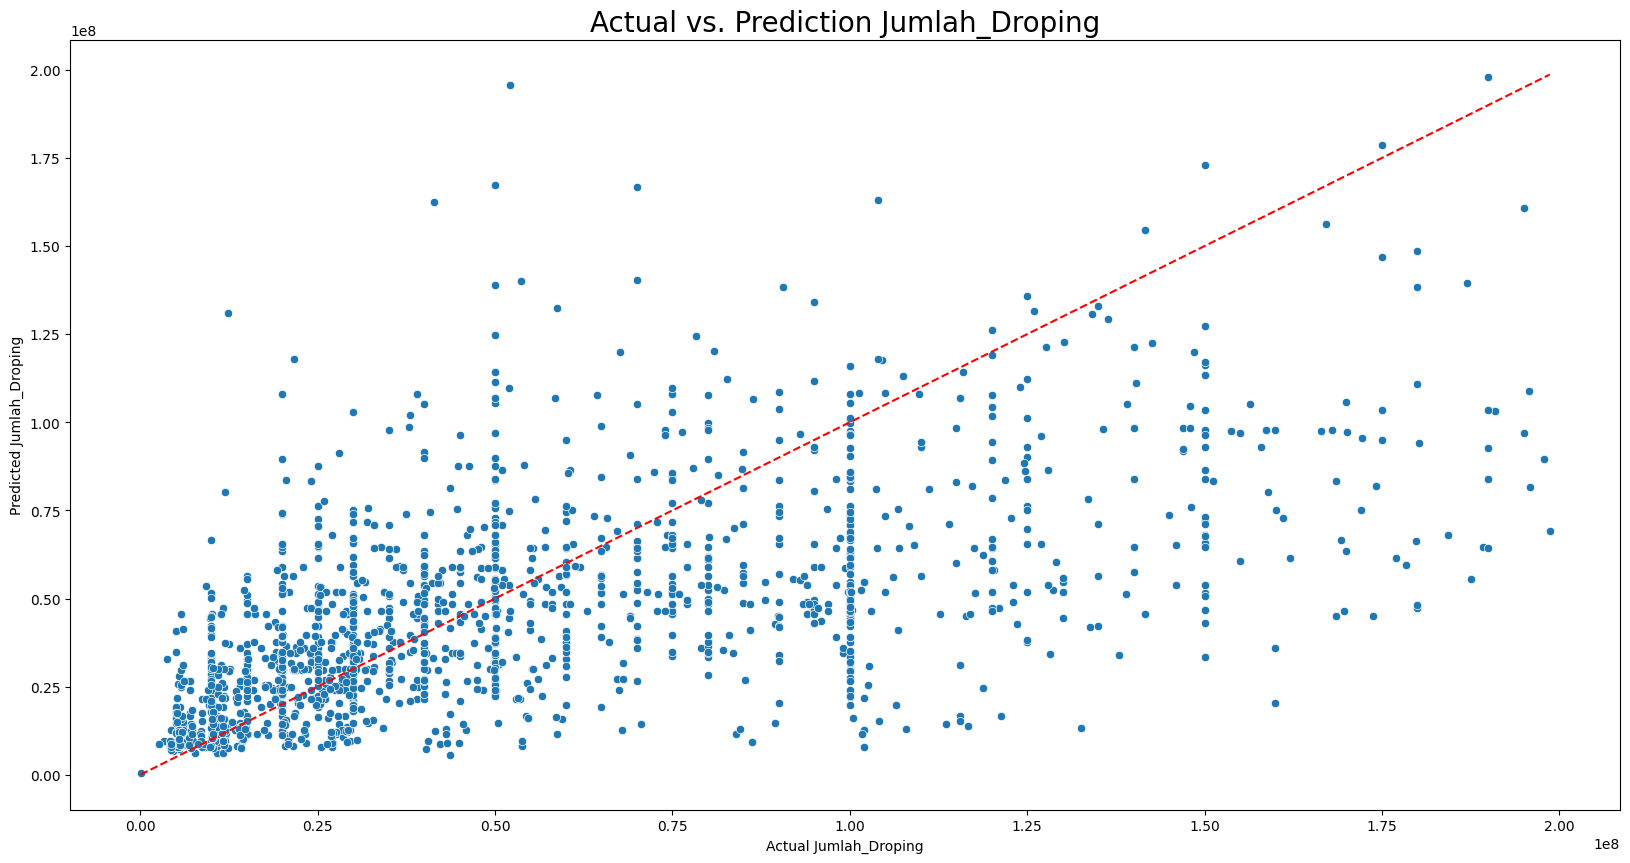

In [37]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_test, y = y_pred_fix)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Prediction Jumlah_Droping', size=20)
plt.xlabel('Actual Jumlah_Droping')
plt.ylabel('Predicted Jumlah_Droping')
plt.show()
# plt.savefig('Scatrerplot Actual vs Predistion Sale Price.jpg')


In [38]:
X

,JK_WAKTU_TAHUN,KOL,RATE_CUST,C09_SEGMENTASI_ACCOUNT,SEKTOR_LOAN,KATEGORI_NASABAH,SEGMENT_GROUP,FIXED_INCOME,MARITAL_STATUS
0,6.00,NORM,29.78,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
1,7.00,NORM,39.45,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 5 JUTA s.d < 10 JUTA,KAWIN
2,4.00,NORM,15.59,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,BMI_STAFF,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN
3,3.00,NORM,11.16,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,MENIKAH
4,3.00,NORM,28.35,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,KAWIN
...,...,...,...,...,...,...,...,...,...
10453,1.00,NORM,8.31,48_CONSUMER_CICIL_EMAS,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,KAWIN
10454,1.00,NORM,8.31,48_CONSUMER_CICIL_EMAS,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,KAWIN
10456,10.00,NORM,58.58,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,< Rp. 3 JUTA,KAWIN
10458,8.00,NORM,45.67,45_CONSUMER_MULTI PURPOSE,3_Konsumsi,INDIVIDUAL,5-CONSUMER,Rp. 3 JUTA s.d < 5 JUTA,BELUM KAWIN
